In [6]:
import sys
import os

""" I actually do not know why I need to do this but the code will not run without it.
I don't use Jupyter notebooks usually, so I'm not sure why my imports are failing w/o this. 
Pls weigh in if you know what's going on! """

sys.path = [p for p in sys.path if 'src' not in p]

# Explicitly adding the correct path to 'src'
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
print("Adding to sys.path:", src_path)
sys.path.append(src_path)


Adding to sys.path: /Users/Student/Computational-Geometry-IS/src


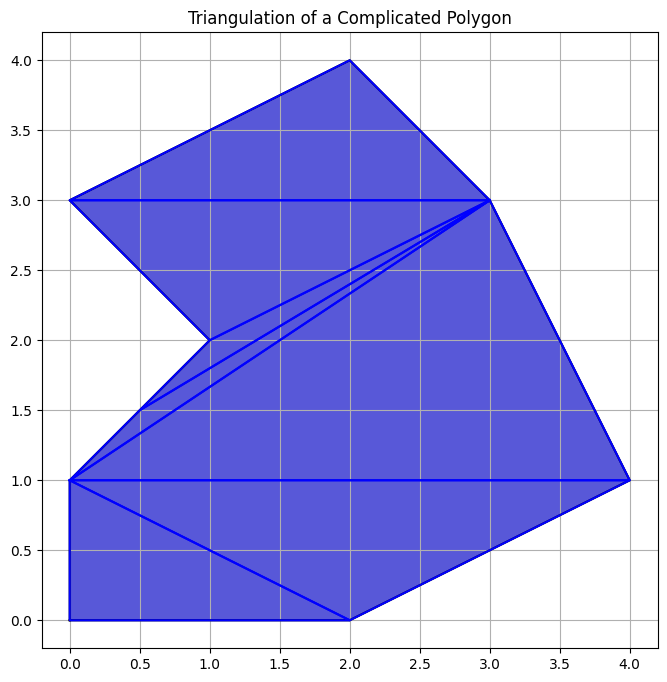

Triangle 1: Triangle(Point(0, 1), Point(0, 0), Point(2, 0))
Triangle 2: Triangle(Point(0, 1), Point(2, 0), Point(4, 1))
Triangle 3: Triangle(Point(0, 1), Point(4, 1), Point(3, 3))
Triangle 4: Triangle(Point(3, 3), Point(2, 4), Point(0, 3))
Triangle 5: Triangle(Point(3, 3), Point(0, 3), Point(1, 2))
Triangle 6: Triangle(Point(3, 3), Point(1, 2), Point(0.5, 1.5))
Triangle 7: Triangle(Point(3, 3), Point(0.5, 1.5), Point(0, 1))


In [7]:
import matplotlib.pyplot as plt
from  basics.point import Point
from basics.line import Line
from basics.polygon import Polygon
from algorithms.triangulation import triangulate_polygon, Triangle

def plot_polygon(polygon, ax, color='black', fill=True):
    """Helper function to plot a polygon."""
    xs = [vertex.x for vertex in polygon.vertices] + [polygon.vertices[0].x]
    ys = [vertex.y for vertex in polygon.vertices] + [polygon.vertices[0].y]
    ax.plot(xs, ys, color=color)
    if fill:
        ax.fill(xs, ys, alpha=0.3, color=color)

def plot_triangle(triangle, ax, color='blue'):
    """Helper function to plot a triangle."""
    xs = [vertex.x for vertex in triangle.vertices] + [triangle.vertices[0].x]
    ys = [vertex.y for vertex in triangle.vertices] + [triangle.vertices[0].y]
    ax.plot(xs, ys, color=color)
    ax.fill(xs, ys, alpha=0.5, color=color)

# Define a complicated polygon (example with concave parts)
vertices = [
    Point(0, 0), Point(2, 0), Point(4, 1), Point(3, 3), Point(2, 4),
    Point(0, 3), Point(1, 2), Point(0.5, 1.5), Point(0, 1)  # Irregular concave points
]
complicated_polygon = Polygon(vertices)

# Triangulate the polygon
triangles = triangulate_polygon(complicated_polygon)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot original polygon
plot_polygon(complicated_polygon, ax, color='black')

# Plot the triangles formed by triangulation
for triangle in triangles:
    plot_triangle(triangle, ax, color='blue')

# Adjust plot settings
ax.set_aspect('equal')
ax.set_title('Triangulation of a Complicated Polygon')
ax.grid(True)
plt.show()

# Print triangles for reference
for i, triangle in enumerate(triangles):
    print(f"Triangle {i + 1}: {triangle}")